<center><a href="#"><img src = "https://3d-media.pro/images/Logo-DATA-For-Developpement.png" width = 250, align = "center"></a></center>

<h1 style="text-align:center;"> Project: Develop an end-to-end Machine Learning Pipeline </h1> 

<h3 style="text-align:center;">Instructor: Assan Sanogo</h3>

<h3>Project Overview:</h3>
<p>This project is based on a dataset of 7000+ essays graded by English specialists. This data problem is close to a real-world situation as it requires to be cleaned, an EDA must be thoroughly done so that the team can engineer relevant features.</p>
<p>This project is a NLP problem that will be the foundation of an English program used by the company Easy Sailing Language Training. Their ambition is to have a reliable tool to assess new students’ ability to write in English according to the IELTS grading system. In turn it would help prospective students in knowing how much time they need to invest to get to the next level.</p>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
    * [data cleaning](#datacleaning)
    * [data processing](#dataprocessing)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

### Introduction: Business Problem <a name="introduction"></a>
<p><strong>DETEMLP</strong> is a project that aims to develop an end-to-end pipeline to process essays and output a grade describing the level of English proficiency. This project is based on a dataset of 7000+ essays graded by English specialists. </p>
<p>The goal is to <strong>create a reliable tool to assess new students’ ability to write in English according to the IELTS grading system</strong>. In this project, we’ll be using data processing, data cleaning, and NLP techniques, including the librairie Spacy. If during this trip we struggle with the dataset, we might reframe the problem as a classification problem.</p>
<p>Let’s dive in</p>

### Data<a name="data"></a>
<p>
Our data collection has been really simplify, here the list of our dataset : </p>
<ul>
<li>test_set.tsv</li>
<li>training_set_rel3.tsv</li>
<li>training_set_rel3.xls</li>
<li>training_set_rel3.xlsx</li>
<li>valid_sample_submission_1_column.csv</li>
<li>valid_sample_submission_1_column_no_header.csv</li>
<li>valid_sample_submission_2_column.csv</li>
<li>valid_sample_submission_5_column.csv</li>
<li>valid_set.tsv</li>
<li>valid_set.xls</li>
<li>valid_set.xlsx </li>
</ul>

<p></p>

<i>Data Cleaning<a name="datacleaning"></a></i>

In [43]:
# import librairies and download necessary files
# python -m spacy download en_core_web_sm
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')
# nltk.download('averaged_perceptron_tagger')

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from spellchecker import SpellChecker
from textblob import TextBlob
import spacy
from collections import Counter
from spellchecker import SpellChecker
import language_tool_python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [44]:
# take a look to valid set
valid_set = pd.read_csv("valid_set.tsv",sep="\t",encoding="latin1")
valid_set.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN


In [45]:
valid_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   essay_id              4218 non-null   int64  
 1   essay_set             4218 non-null   int64  
 2   essay                 4218 non-null   object 
 3   domain1_predictionid  4218 non-null   int64  
 4   domain2_predictionid  600 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 164.9+ KB


In [46]:
valid_set.describe()    

,essay_id,essay_set,domain1_predictionid,domain2_predictionid
count,4218.000000,4218.000000,4218.000000,600.000000
mean,11282.446420,4.123518,13735.433618,7178.000000
std,6173.633131,2.117188,6964.020021,346.698716
min,1788.000000,1.000000,1788.000000,6579.000000
25%,5243.250000,2.000000,7508.500000,6878.500000
50%,10995.500000,4.000000,13995.500000,7178.000000
75%,16852.750000,6.000000,19852.750000,7477.500000
max,21938.000000,8.000000,24938.000000,7777.000000


In [47]:
valid_set.isnull().sum()    # no missing values

essay_id                   0
essay_set                  0
essay                      0
domain1_predictionid       0
domain2_predictionid    3618
dtype: int64

In [48]:
# take a look to train set
training_set= pd.read_csv('training_set_rel3.tsv', delimiter='\t', encoding='latin1')
training_set.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [50]:
training_set.isnull().sum()    # no missing values

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [51]:
# valid sample submission
sample_submission = pd.read_csv("valid_sample_submission_5_column.csv",encoding="latin1")
sample_submission.head()

,prediction_id,essay_id,essay_set,essay_weight,predicted_score
0,1788,1788,1,1.0,7
1,1789,1789,1,1.0,8
2,1790,1790,1,1.0,9
3,1791,1791,1,1.0,9
4,1792,1792,1,1.0,9


In [52]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prediction_id    4818 non-null   int64  
 1   essay_id         4818 non-null   int64  
 2   essay_set        4818 non-null   int64  
 3   essay_weight     4818 non-null   float64
 4   predicted_score  4818 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 188.3 KB


In [53]:
sample_submission.describe()

,prediction_id,essay_id,essay_set,essay_weight,predicted_score
count,4818.000000,4818.000000,4818.00000,4818.000000,4818.000000
mean,12918.816729,10509.725820,3.85907,0.875467,6.240764
std,6867.367811,6129.318271,2.10140,0.216259,8.308969
min,1788.000000,1788.000000,1.00000,0.500000,0.000000
25%,7193.250000,5085.250000,2.00000,1.000000,2.000000
50%,13694.500000,10694.500000,4.00000,1.000000,3.000000
75%,19702.750000,16702.750000,6.00000,1.000000,7.000000
max,24938.000000,21938.000000,8.00000,1.000000,50.000000


In [54]:
sample_submission.isnull().sum()    # no missing values 

prediction_id      0
essay_id           0
essay_set          0
essay_weight       0
predicted_score    0
dtype: int64

In [55]:
# drop the columns that are not useful
training_set.drop(columns=['rater1_domain1','rater2_domain1'], axis=1, inplace=True)

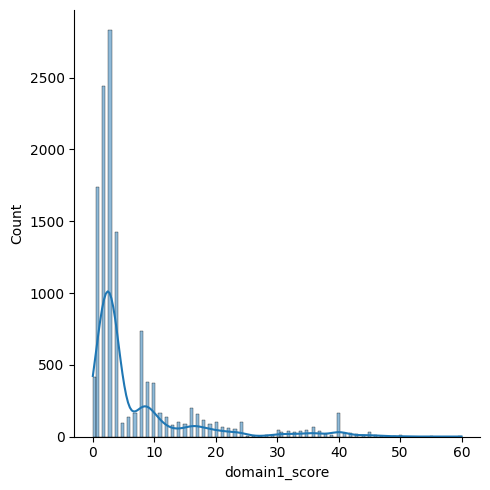

In [56]:
#Check Skewness
sns.displot(training_set['domain1_score'], kde=True)
plt.show()

In [57]:
# Normalizethedomain1_score
def normalizer(training_set, domain1_socre):
    min_values = training_set.groupby('essay_set')[domain1_socre].min()
    max_values = training_set.groupby('essay_set')[domain1_socre].max()
    training_set['normalized_score'] = training_set.apply(lambda row: int(20 * (row[domain1_socre] - min_values[row['essay_set']]) / (max_values[row['essay_set']] - min_values[row['essay_set']])), axis=1)
    return training_set


In [58]:
#Apply the Function normalizer to training set
training_set_normalized = (training_set.groupby('essay_set', group_keys=False, as_index=False).apply(lambda group: normalizer(group, 'domain1_score')))

In [59]:
#Check the Normalized Score
training_set_normalized.head()

,essay_id,essay_set,essay,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalized_score
0,1,1,"Dear local newspaper, I think effects computer...",NaN,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",NaN,9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",NaN,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",NaN,10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
4,5,1,"Dear @LOCATION1, I know having computers has a...",NaN,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


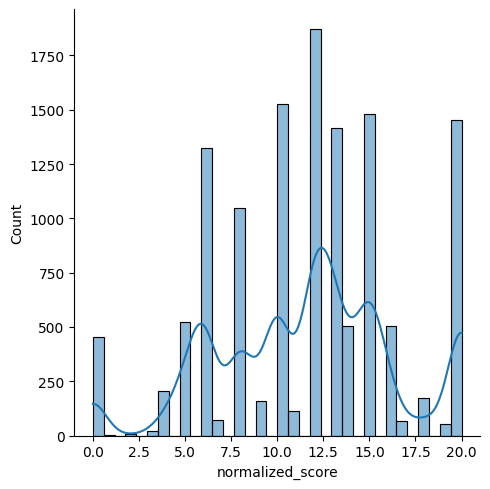

In [60]:
#Check Skew after normalization
sns.displot(training_set_normalized['normalized_score'], kde=True)
plt.show()

In [61]:
training_set_normalized.dropna(axis=1, inplace= True)

In [62]:
# delete the columns that are not useful
training_set_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12976 entries, 0 to 12975
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   essay_id          12976 non-null  int64 
 1   essay_set         12976 non-null  int64 
 2   essay             12976 non-null  object
 3   domain1_score     12976 non-null  int64 
 4   normalized_score  12976 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 608.2+ KB


In [63]:
# THE FEATURES HAHAHAHA
def calculate_features(text):
    """
    Calcule une série de fonctionnalités linguistiques à partir d'un texte donné.
    """

    # Préparation
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    word_counts = Counter(words)
    spell = SpellChecker()
    misspelled = spell.unknown(words)

    # 0. Faute d'Orthographe

    spell = SpellChecker(language='en')
    misspelled = spell.unknown(words)
    # Le nombre de mots mal orthographiés est le nombre de fautes d'orthographe
    count_spelling_errors = len(misspelled)

    # 1. Longueur du texte
    text_length = len(text)

    # 2. Nombre de phrases
    num_sentences = len(sentences)

    # 3. Nombre de mots
    num_words = len(words)

    # 4. Taille moyenne des mots
    avg_word_length = sum(len(word) for word in words) / num_words

    # 5. Nombre de mots uniques
    num_unique_words = len(set(words))

    # 6. Fréquence des mots de fonction
    function_words = set(stopwords.words('english'))
    function_word_frequency = sum(word_counts[word] for word in function_words)

    # 7. Fréquence des mots de contenu
    content_words = set(words) - function_words
    content_word_frequency = sum(word_counts[word] for word in content_words)

    # 9. Fréquence des erreurs d'orthographe
    spelling_errors = len(misspelled)

    # 10. Fréquence des erreurs de grammaire


    # 11. Fréquence des mots positifs/négatifs
    # Ceci nécessiterait une liste de mots positifs/négatifs
    # Ici, nous utilisons le module NLTK's Vader qui a une liste intégrée de mots positifs et négatifs
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    positive_word_proportion = sentiment['pos']
    negative_word_proportion = sentiment['neg']

    # 12. Fréquence des entités nommées
    # Ceci est plus complexe à calculer et nécessiterait une bibliothèque spécialisée
    # Ici, nous utilisons la bibliothèque SpaCy qui a un bon support pour l'extraction d'entités nommées
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    named_entities = [ent.text for ent in doc.ents]
    named_entity_frequency = len(named_entities)

    # 13. Fréquence des citations
    quote_frequency = text.count('"') // 2

    # 14. Fréquence des majuscules
    uppercase_frequency = sum(1 for char in text if char.isupper())

    # 15. Fréquence des signes de ponctuation
    punctuation_marks = {'.', ',', '!', '?', ':', ';', '-', '(', ')', '[', ']', '{', '}', '"', "'"}
    punctuation_frequency = sum(text.count(mark) for mark in punctuation_marks)

    # 16. Fréquence des adverbes
    adverb_frequency = sum(1 for word, pos in pos_tag(words) if pos == 'RB')

    # 17. Fréquence des verbes au passé
    past_tense_verb_frequency = sum(1 for word, pos in pos_tag(words) if pos == 'VBD')

    # 18. Fréquence des verbes au présent
    present_tense_verb_frequency = sum(1 for word, pos in pos_tag(words) if pos in ('VB', 'VBG', 'VBP', 'VBZ'))

    # 19. Fréquence des pronoms
    pronoun_frequency = sum(1 for word, pos in pos_tag(words) if pos in ('PRP', 'PRP$', 'WP', 'WP$'))

    # 20. Fréquence des conjonctions de coordination
    coordinating_conjunction_frequency = sum(1 for word, pos in pos_tag(words) if pos == 'CC')

    # 21. Fréquence des adjectifs : Les adjectifs modifient les noms et peuvent indiquer le style d’écriture.
    tagged = pos_tag(word_tokenize(text))
    adjective_frequency = sum(1 for word, pos in tagged if pos == 'JJ')

    # 22. Fréquence des noms propres : Les noms propres sont des noms spécifiques à des personnes, des lieux, etc. Leur fréquence peut indiquer le sujet du texte.
    tagged_np = pos_tag(word_tokenize(text))
    proper_noun_frequency = sum(1 for word, pos in tagged_np if pos == 'NNP')

    # 23. Fréquence des modaux : Les modaux sont des auxiliaires qui expriment la nécessité, la possibilité, la permission, etc. Leur fréquence peut indiquer le ton du texte.
    tagged_mf = pos_tag(word_tokenize(text))
    modal_frequency = sum(1 for word, pos in tagged_mf if pos == 'MD')

    # 24. Fréquence des déterminants : Les déterminants sont des mots qui précèdent les noms pour indiquer leur référence. Leur fréquence peut indiquer le style d’écriture.
    tagged_df = pos_tag(word_tokenize(text))
    determiner_frequency = sum(1 for word, pos in tagged_df if pos == 'DT')

    # 25. Fréquence des prépositions : Les prépositions relient les noms, les pronoms et les phrases à d’autres mots dans une phrase. Leur fréquence peut indiquer la complexité de la structure des phrases.
    tagged_pf = pos_tag(word_tokenize(text))
    preposition_frequency = sum(1 for word, pos in tagged_pf if pos == 'IN')

    # 26. Fréquence des pronoms interrogatifs : Les pronoms interrogatifs introduisent des questions. Leur fréquence peut indiquer si le texte contient beaucoup de questions.
    tagged_ipf = pos_tag(word_tokenize(text))
    interrogative_pronoun_frequency = sum(1 for word, pos in tagged_ipf if pos in ('WP', 'WP$'))

    # 27. Fréquence des adverbes interrogatifs : Les adverbes interrogatifs introduisent des questions. Leur fréquence peut indiquer si le texte contient beaucoup de questions.
    tagged_iaf = pos_tag(word_tokenize(text))
    interrogative_adverb_frequency = sum(1 for word, pos in tagged_iaf if pos == 'WRB')

    # 28. Fréquence des adverbes de négation : Les adverbes de négation expriment une négation. Leur fréquence peut indiquer le ton du texte
    tagged_naf = pos_tag(word_tokenize(text))
    negation_adverb_frequency = sum(1 for word, pos in tagged_naf if word in ('not', 'never', 'no'))

    # 29. Fréquence des adverbes de degré : Les adverbes de degré modifient les adjectifs et les adverbes pour indiquer le degré. Leur fréquence peut indiquer le style d’écriture.
    tagged_daf = pos_tag(word_tokenize(text))
    degree_adverb_frequency = sum(1 for word, pos in tagged_daf if word in ('very', 'too', 'so', 'quite', 'pretty', 'rather', 'somewhat', 'fairly'))

    # 30. Fréquence des adverbes de manière : Les adverbes de manière décrivent la manière dont une action est effectuée. Leur fréquence peut indiquer le style d’écriture.
    tagged_maf = pos_tag(word_tokenize(text))
    manner_adverb_frequency = sum(1 for word, pos in tagged_maf if pos == 'RB' and word.endswith('ly'))

    # 31. Fréquence des pronoms démonstratifs : Les pronoms démonstratifs indiquent des entités spécifiques. Leur fréquence peut indiquer le style d’écriture.
    tagged_dpf = pos_tag(word_tokenize(text))
    demonstrative_pronoun_frequency = sum(1 for word, pos in tagged_dpf if word in ('this', 'that', 'these', 'those'))

    # 32. Fréquence des pronoms possessifs : Les pronoms possessifs indiquent la possession. Leur fréquence peut indiquer le style d’écriture.
    tagged_ppf = pos_tag(word_tokenize(text))
    possessive_pronoun_frequency = sum(1 for word, pos in tagged_ppf if word in ('my', 'your', 'his', 'her', 'its', 'our', 'their'))

    # 33. Fréquence des pronoms réfléchis : Les pronoms réfléchis renvoient à d’autres entités dans la phrase. Leur fréquence peut indiquer le style d’écriture.
    tagged_rpf = pos_tag(word_tokenize(text))
    reflexive_pronoun_frequency = sum(1 for word, pos in tagged_rpf if word in ('myself', 'yourself', 'himself', 'herself', 'itself', 'ourselves', 'yourselves', 'themselves'))

    # 34. Fréquence des pronoms réciproques : Les pronoms réciproques indiquent une action mutuelle. Leur fréquence peut indiquer le style d’écriture.
    tagged_rpf2 = pos_tag(word_tokenize(text))
    reciprocal_pronoun_frequency = sum(1 for word, pos in tagged_rpf2 if word in ('each other', 'one another'))

    # 35. Fréquence des pronoms indéfinis : Les pronoms indéfinis ne renvoient pas à des entités spécifiques. Leur fréquence peut indiquer le style d’écriture.
    tagged_ipf2 = pos_tag(word_tokenize(text))
    indefinite_pronoun_frequency = sum(1 for word, pos in tagged_ipf2 if word in ('all', 'another', 'any', 'anybody', 'anyone', 'anything', 'each', 'everybody', 'everyone', 'everything', 'few', 'many', 'nobody', 'none', 'nothing', 'one', 'several', 'some', 'somebody', 'someone', 'something'))
    
    # 36. Fréquence des adjectifs possessifs : Les adjectifs possessifs indiquent la possession. Leur fréquence peut indiquer le style d’écriture.
    tagged_af = pos_tag(word_tokenize(text))
    possessive_adjective_frequency = sum(1 for word, pos in tagged_af if word in ('my', 'your', 'his', 'her', 'its', 'our', 'their'))

    # 37. Fréquence des adjectifs démonstratifs : Les adjectifs démonstratifs indiquent des entités spécifiques. Leur fréquence peut indiquer le style d’écriture.
    tagged_daf2 = pos_tag(word_tokenize(text))
    demonstrative_adjective_frequency = sum(1 for word, pos in tagged_daf2 if word in ('this', 'that', 'these', 'those'))

    # 38. Fréquence des adjectifs indéfinis : Les adjectifs indéfinis ne renvoient pas à des entités spécifiques. Leur fréquence peut indiquer le style d’écriture.
    tagged_iaf2 = pos_tag(word_tokenize(text))
    indefinite_adjective_frequency = sum(1 for word, pos in tagged_iaf2 if word in ('all', 'another', 'any', 'both', 'each', 'few', 'many', 'several', 'some'))

    # 39. Fréquence des adjectifs interrogatifs : Les adjectifs interrogatifs introduisent des questions. Leur fréquence peut indiquer si le texte contient beaucoup de questions.
    tagged_iaf3 = pos_tag(word_tokenize(text))
    interrogative_adjective_frequency = sum(1 for word, pos in tagged_iaf3 if word in ('which', 'what', 'whose'))

    # 40. Fréquence des adjectifs exclamatifs : Les adjectifs exclamatifs expriment une émotion ou une réaction. Leur fréquence peut indiquer le ton du texte.
    tagged_eaf = pos_tag(word_tokenize(text))
    exclamatory_adjective_frequency = sum(1 for word, pos in tagged_eaf if word in ('what', 'such'))

    # 41. Fréquence des verbes auxiliaires : Les verbes auxiliaires sont utilisés avec d’autres verbes pour indiquer le temps, la voix, l’humeur, etc. Leur fréquence peut indiquer le style d’écriture.
    tagged_avf = pos_tag(word_tokenize(text))
    auxiliary_verb_frequency = sum(1 for word, pos in tagged_avf if word in ('be', 'have', 'do', 'can', 'could', 'may', 'might', 'must', 'shall', 'should', 'will', 'would'))

    # 42. Fréquence des verbes modaux : Les verbes modaux expriment la nécessité, la possibilité, la permission, etc. Leur fréquence peut indiquer le ton du texte.
    tagged_mvf = pos_tag(word_tokenize(text))
    modal_verb_frequency = sum(1 for word, pos in tagged_mvf if word in ('can', 'could', 'may', 'might', 'must', 'shall', 'should', 'will', 'would'))
    
    # 43. Fréquence des adverbes modificateurs : Les adverbes modificateurs modifient les adjectifs et les adverbes pour indiquer le degré. Leur fréquence peut indiquer le style d’écriture.
    tagged_maf2 = pos_tag(word_tokenize(text))
    modifier_adverb_frequency = sum(1 for word, pos in tagged_maf2 if word in ('very', 'too', 'so', 'quite', 'pretty', 'rather', 'somewhat', 'fairly'))

    # 44. Fréquence des adverbes de liaison : Les adverbes de liaison introduisent une phrase ou une clause. Leur fréquence peut indiquer le style d’écriture.
    tagged_laf = pos_tag(word_tokenize(text))
    linking_adverb_frequency = sum(1 for word, pos in tagged_laf if word in ('however', 'therefore', 'consequently', 'meanwhile', 'furthermore', 'otherwise'))

    # 45. Fréquence des adverbes de négation : Les adverbes de négation expriment une négation. Leur fréquence peut indiquer le ton du texte.
    tagged_naf2 = pos_tag(word_tokenize(text))
    negation_adverb_frequency = sum(1 for word, pos in tagged_naf2 if word in ('not', 'never', 'no'))

    # 46. Fréquence des adverbes de degré : Les adverbes de degré modifient les adjectifs et les adverbes pour indiquer le degré. Leur fréquence peut indiquer le style d’écriture.
    tagged_daf3 = pos_tag(word_tokenize(text))
    degree_adverb_frequency = sum(1 for word, pos in tagged_daf3 if word in ('very', 'too', 'so', 'quite', 'pretty', 'rather', 'somewhat', 'fairly'))

    # 47. Fréquence des adverbes de manière : Les adverbes de manière décrivent la manière dont une action est effectuée. Leur fréquence peut indiquer le style d’écriture.
    tagged_maf3 = pos_tag(word_tokenize(text))
    manner_adverb_frequency = sum(1 for word, pos in tagged_maf3 if pos == 'RB' and word.endswith('ly'))

    # 48. Fréquence des adverbes de lieu : Les adverbes de lieu indiquent le lieu d’une action. Leur fréquence peut indiquer le sujet du texte.
    tagged_paf = pos_tag(word_tokenize(text))
    place_adverb_frequency = sum(1 for word, pos in tagged_paf if word in ('here', 'there', 'everywhere', 'somewhere', 'anywhere', 'nowhere'))

    # 49. Fréquence des conjonctions de coordination : Les conjonctions de coordination relient des mots, des phrases ou des clauses de même importance. Leur fréquence peut indiquer la complexité de la structure des phrases.
    tagged_ccf = pos_tag(word_tokenize(text))
    coordinating_conjunction_frequency = sum(1 for word, pos in tagged_ccf if word in ('and', 'but', 'or', 'so', 'yet', 'for', 'nor'))

    # 50. Fréquence des conjonctions de subordination : Les conjonctions de subordination relient une clause subordonnée à une clause principale. Leur fréquence peut indiquer la complexité de la structure des phrases.
    tagged_scf = pos_tag(word_tokenize(text))
    subordinating_conjunction_frequency = sum(1 for word, pos in tagged_scf if word in ('although', 'because', 'if', 'unless', 'while', 'though', 'whereas', 'as', 'since', 'when', 'until', 'after', 'before'))

    # 51. Fréquence des conjonctions corrélatives : Les conjonctions corrélatives travaillent en paires pour relier des mots, des phrases ou des clauses de même importance. Leur fréquence peut indiquer la complexité de la structure des phrases.
    tagged_ccf2 = pos_tag(word_tokenize(text))
    correlative_conjunction_frequency = sum(1 for word, pos in tagged_ccf2 if word in ('either', 'or', 'neither', 'nor', 'not only', 'but also', 'whether', 'or', 'as', 'as', 'so', 'as'))

    # 52. Fréquence des interjections : Les interjections sont des mots ou des expressions qui expriment une émotion ou une réaction. Leur fréquence peut indiquer le ton du texte.
    tagged_if = pos_tag(word_tokenize(text))
    interjection_frequency = sum(1 for word, pos in tagged_if if pos == 'UH')

    # 53. Fréquence des onomatopées : Les onomatopées sont des mots qui imitent les sons. Leur fréquence peut indiquer le sujet du texte.
    tagged_of = pos_tag(word_tokenize(text))
    onomatopoeia_frequency = sum(1 for word, pos in tagged_of if word in ('bang', 'beep', 'buzz', 'click', 'ding', 'hiss', 'pop', 'sizzle', 'snap', 'whack', 'whoosh', 'zip', 'clank', 'clang', 'creak', 'crunch', 'gulp', 'jingle', 'jangle', 'rattle', 'snore', 'sniff', 'snort', 'squeak', 'swoosh', 'thud', 'toot', 'twang', 'yelp', 'zing', 'boing', 'zap', 'pow', 'zip', 'swish', 'splash', 'crash', 'chirp', 'tweet', 'honk', 'vroom', 'beep', 'zoom', 'giggle', 'murmur', 'moo', 'oink', 'quack'))

    # 54. Fréquence des palindromes : Les palindromes sont des mots qui se lisent de la même manière de gauche à droite et de droite à gauche. Leur fréquence peut indiquer le style d’écriture.
    words = text.split()
    palindrome_frequency = sum(1 for word in words if word == word[::-1])

    return {
        'count_spelling_errors' : count_spelling_errors,
        'text_length': text_length,
        'num_sentences': num_sentences,
        'num_words': num_words,
        'avg_word_length': avg_word_length,
        'num_unique_words': num_unique_words,
        'function_word_frequency': function_word_frequency,
        'content_word_frequency': content_word_frequency,
        'spelling_errors': spelling_errors,
        'quote_frequency': quote_frequency,
        'uppercase_frequency': uppercase_frequency,
        'punctuation_frequency': punctuation_frequency,
        'adverb_frequency': adverb_frequency,
        'past_tense_verb_frequency': past_tense_verb_frequency,
        'present_tense_verb_frequency': present_tense_verb_frequency,
        'pronoun_frequency': pronoun_frequency,
        'coordinating_conjunction_frequency': coordinating_conjunction_frequency,
        'negative_word_proportion' : negative_word_proportion,
        'named_entity_frequency': named_entity_frequency,
        'adjective_frequency': adjective_frequency,
        'proper_noun_frequency' : proper_noun_frequency,
        'modal_frequency' : modal_frequency,
        'determiner_frequency' : determiner_frequency,
        'interrogative_adverb_frequency' : interrogative_adverb_frequency,
        'interrogative_pronoun_frequency' : interrogative_pronoun_frequency,
        'preposition_frequency' : preposition_frequency,
        'negation_adverb_frequency' : negation_adverb_frequency,
        'degree_adverb_frequency' : degree_adverb_frequency,
        'manner_adverb_frequency' : manner_adverb_frequency,
        'demonstrative_pronoun_frequency' : demonstrative_pronoun_frequency,
        'possessive_pronoun_frequency' : possessive_pronoun_frequency,
        'reflexive_pronoun_frequency' : reflexive_pronoun_frequency,
        'reciprocal_pronoun_frequency' : reciprocal_pronoun_frequency,
        'indefinite_pronoun_frequency' : indefinite_pronoun_frequency,
        'possessive_adjective_frequency' : possessive_adjective_frequency,
        'demonstrative_adjective_frequency' : demonstrative_adjective_frequency,
        'indefinite_adjective_frequency' : indefinite_adjective_frequency,
        'interrogative_adjective_frequency' : interrogative_adjective_frequency,
        'exclamatory_adjective_frequency' : exclamatory_adjective_frequency,
        'auxiliary_verb_frequency' : auxiliary_verb_frequency,
        'modal_verb_frequency' : modal_verb_frequency,
        'modifier_adverb_frequency' : modifier_adverb_frequency,
        'linking_adverb_frequency' : linking_adverb_frequency,
        'negation_adverb_frequency' : negation_adverb_frequency,
        'degree_adverb_frequency' : degree_adverb_frequency,
        'manner_adverb_frequency' : manner_adverb_frequency,
        'place_adverb_frequency' : place_adverb_frequency,
        'coordinating_conjunction_frequency' : coordinating_conjunction_frequency,
        'subordinating_conjunction_frequency' : subordinating_conjunction_frequency,
        'correlative_conjunction_frequency' : correlative_conjunction_frequency,
        'interjection_frequency' : interjection_frequency,
        'onomatopoeia_frequency' : onomatopoeia_frequency,
        'palindrome_frequency' : palindrome_frequency,

    }

In [64]:
# Apply the function to the training set normalized
result_dftr = training_set_normalized['essay'].apply((lambda x: pd.Series(calculate_features(x))))

In [65]:
# Concatenate the result with the training set normalized
training_set_normalized_concat = pd.concat([training_set_normalized, result_dftr], axis=1)

In [66]:
# View the training set normalized
training_set_normalized_concat.head()

,essay_id,essay_set,essay,domain1_score,normalized_score,count_spelling_errors,text_length,num_sentences,num_words,avg_word_length,...,auxiliary_verb_frequency,modal_verb_frequency,modifier_adverb_frequency,linking_adverb_frequency,place_adverb_frequency,subordinating_conjunction_frequency,correlative_conjunction_frequency,interjection_frequency,onomatopoeia_frequency,palindrome_frequency
0,1,1,"Dear local newspaper, I think effects computer...",8,12,22.0,1875.0,16.0,386.0,3.984456,...,10.0,4.0,3.0,0.0,1.0,6.0,12.0,0.0,0.0,12.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,14,22.0,2288.0,20.0,464.0,4.030172,...,19.0,14.0,4.0,0.0,0.0,6.0,5.0,0.0,1.0,25.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,10,10.0,1541.0,14.0,313.0,4.035144,...,12.0,4.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,13.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,16,52.0,3165.0,27.0,611.0,4.328969,...,22.0,14.0,2.0,0.0,1.0,5.0,11.0,0.0,1.0,11.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,12,17.0,2569.0,30.0,517.0,4.071567,...,35.0,24.0,8.0,0.0,2.0,7.0,9.0,0.0,2.0,16.0


In [73]:
# export the training set normalized_concat
training_set_normalized_concat.to_csv('training_set_normalized_concat.csv', sep=',', encoding='latin1', index=False)

In [74]:
training_set_normalized_concat = pd.read_csv('training_set_normalized_concat.csv', delimiter=',', encoding='latin1', index_col=0) 
training_set_normalized_concat.head() 

,essay,domain1_score,normalized_score,count_spelling_errors,text_length,num_sentences,num_words,avg_word_length,num_unique_words,function_word_frequency,...,auxiliary_verb_frequency,modal_verb_frequency,modifier_adverb_frequency,linking_adverb_frequency,place_adverb_frequency,subordinating_conjunction_frequency,correlative_conjunction_frequency,interjection_frequency,onomatopoeia_frequency,palindrome_frequency
essay_set,,,,,,,,,,,,,,,,,,,,,
1,"Dear local newspaper, I think effects computer...",8,12,22.0,1875.0,16.0,386.0,3.984456,181.0,165.0,...,10.0,4.0,3.0,0.0,1.0,6.0,12.0,0.0,0.0,12.0
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,14,22.0,2288.0,20.0,464.0,4.030172,209.0,181.0,...,19.0,14.0,4.0,0.0,0.0,6.0,5.0,0.0,1.0,25.0
1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,10,10.0,1541.0,14.0,313.0,4.035144,161.0,132.0,...,12.0,4.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,13.0
1,"Dear Local Newspaper, @CAPS1 I have found that...",10,16,52.0,3165.0,27.0,611.0,4.328969,267.0,208.0,...,22.0,14.0,2.0,0.0,1.0,5.0,11.0,0.0,1.0,11.0
1,"Dear @LOCATION1, I know having computers has a...",8,12,17.0,2569.0,30.0,517.0,4.071567,211.0,216.0,...,35.0,24.0,8.0,0.0,2.0,7.0,9.0,0.0,2.0,16.0


In [76]:
# matrix of correlation
correlation_matrix = training_set_normalized_concat.iloc[:,2:].corr()

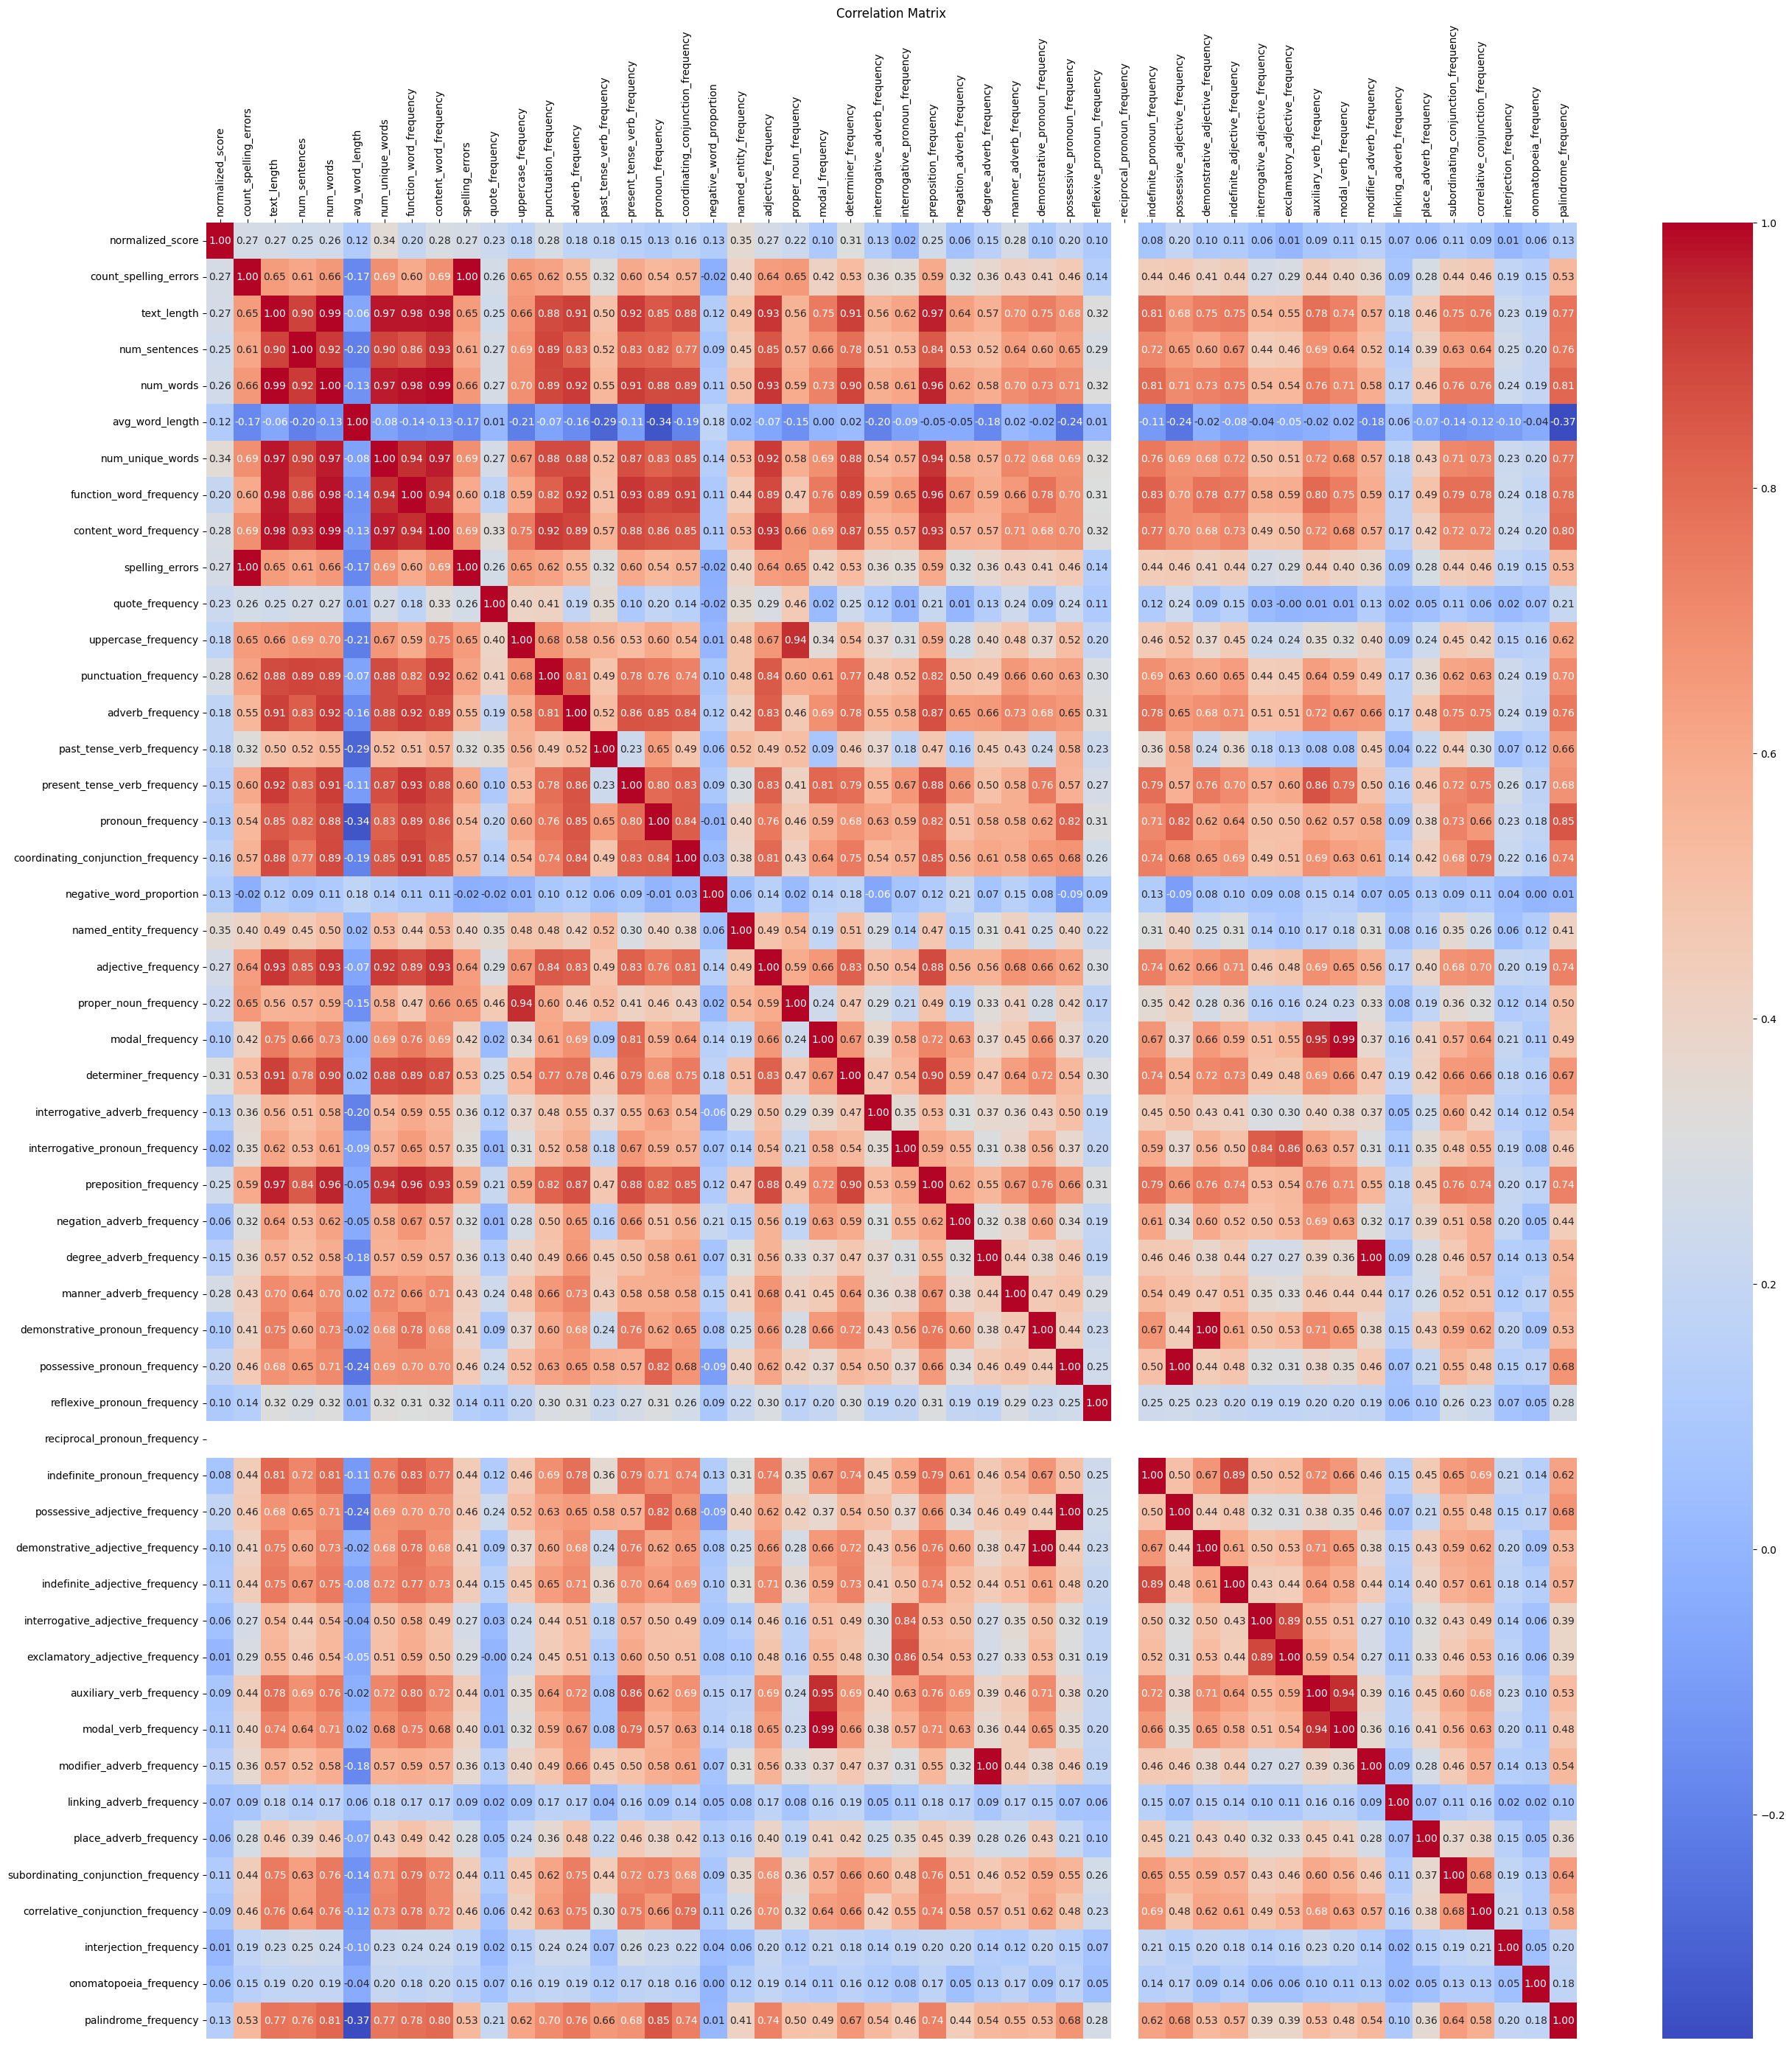

In [77]:
# plot the correlation matrix
plt.figure(figsize=(30, 32))
ax=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='essay_set', ylabel='count'>

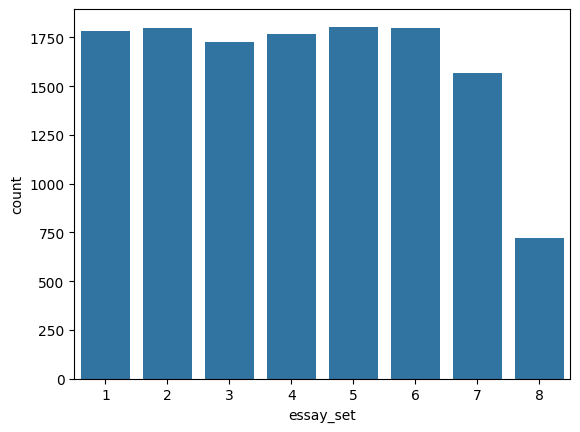

In [78]:
sns.countplot(training_set_normalized_concat, x='essay_set')

<Axes: xlabel='normalized_score', ylabel='count'>

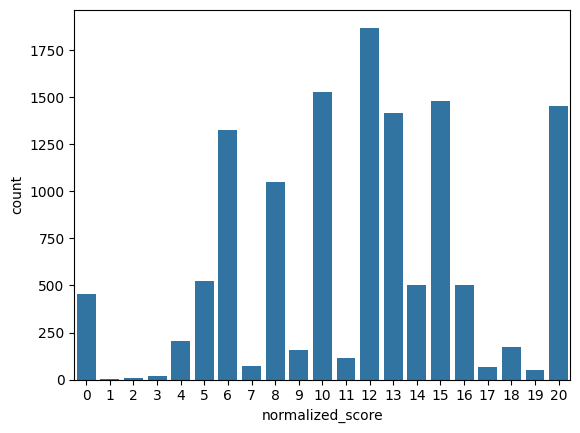

In [79]:
sns.countplot(training_set_normalized_concat, x='normalized_score')